### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [ ]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
image_data = np.load("/content/drive/MyDrive/indian_pines_corrected.npy")

Mounted at /content/drive


1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [ ]:
ground_truth = np.load("/content/drive/MyDrive/indian_pines_gt.npy")

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [ ]:
#2a
height, width, channels = image_data.shape

print("Height of the image:", height)
print("Width of the image:", width)
print("Number of hyperspectral channels:", channels)

Height of the image: 145
Width of the image: 145
Number of hyperspectral channels: 200


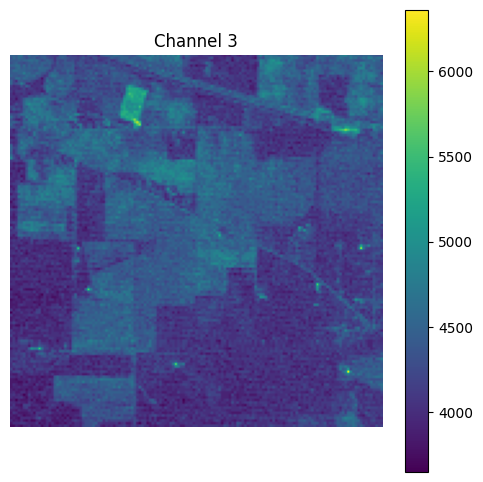

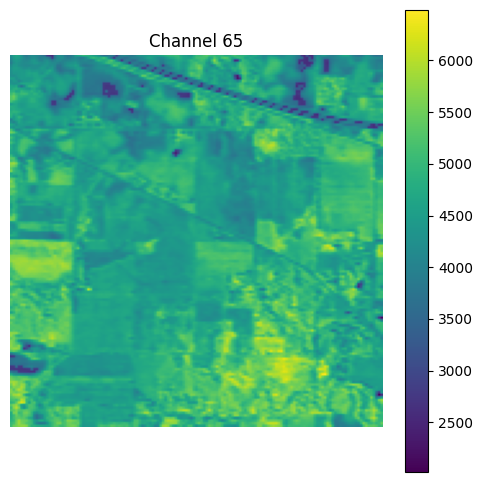

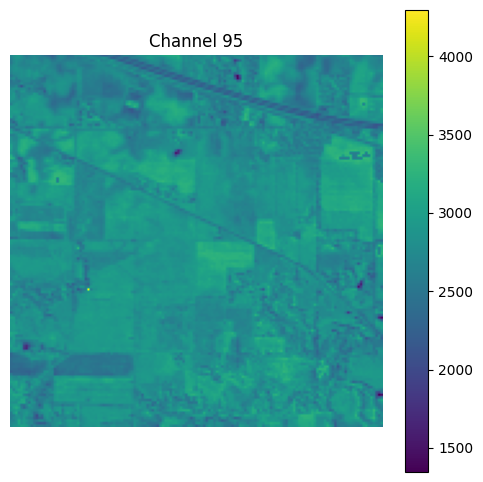

In [ ]:
#2b
import matplotlib.pyplot as plt

# Channels to plot (indexing in python starts from 0)
channels_to_plot = [2, 64, 94]  # Channels 3rd, 65th, and 95th

# Plot each selected channel
for channel in channels_to_plot:
    plt.figure(figsize=(6, 6))
    plt.imshow(image_data[:, :, channel], cmap='viridis')  # Display the channel
    plt.title(f"Channel {channel + 1}")
    plt.colorbar()
    plt.axis('off')

plt.show()

In [ ]:
#2c

# Calculate the number of unique categories/classes
unique_classes = np.unique(ground_truth)

# Count the number of unique classes
num_classes = len(unique_classes)

print("Number of different cultivation categories/classes:", num_classes)


Number of different cultivation categories/classes: 17


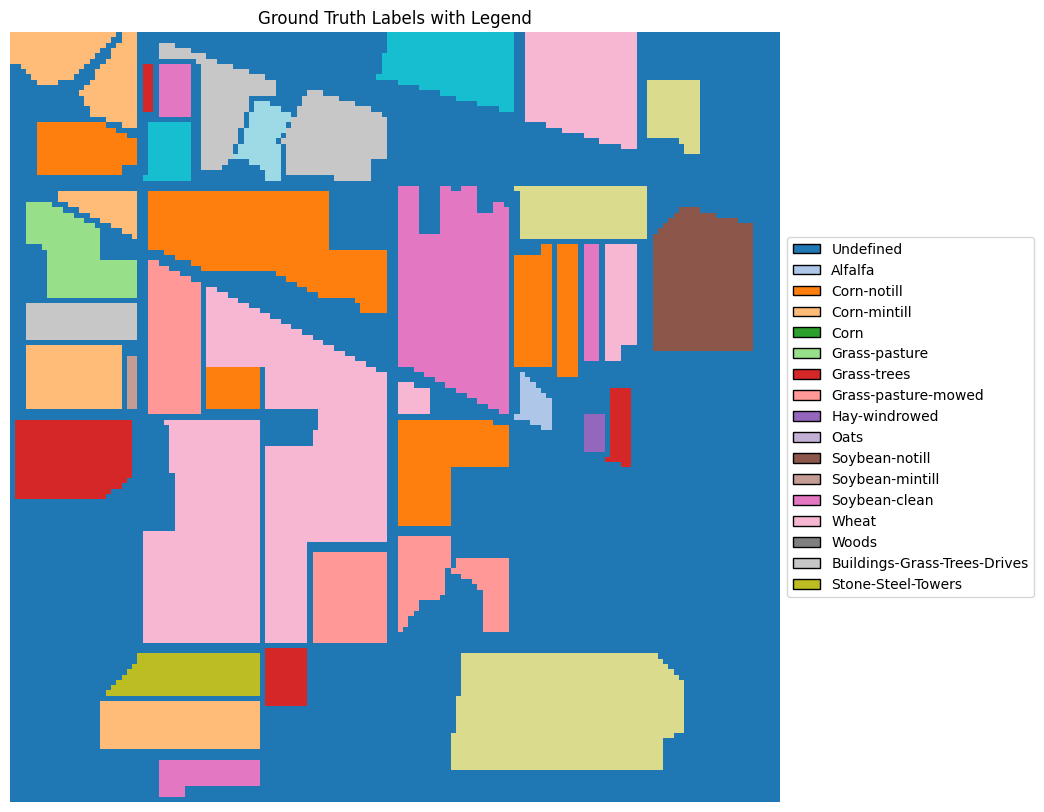

In [ ]:
#2d

from matplotlib.patches import Patch  # Add this line to import Patch


# Define the classes list
classes = [
    "Undefined", "Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees",
    "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean",
    "Wheat", "Woods", "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"
]

# Create a figure and display the ground truth labels
plt.figure(figsize=(10, 10))
plt.imshow(ground_truth, cmap='tab20')

# Generate legend handles for each class
legend_elements = [Patch(facecolor=plt.cm.tab20(i), edgecolor='black', label=classes[i])
                   for i in range(len(classes))]


# Add the legend to the plot
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Ground Truth Labels with Legend")
plt.axis('off')
plt.show()

In [ ]:
#2e

# Calculate the number of pixels for each class
class_pixels_count = {class_name: np.sum(ground_truth == class_idx) for class_idx, class_name in enumerate(classes)}

# Display the count of pixels for each class
for class_name, pixels_count in class_pixels_count.items():
    print(f"Class: {class_name}, Pixels Count: {pixels_count}")

Class: Undefined, Pixels Count: 10776
Class: Alfalfa, Pixels Count: 46
Class: Corn-notill, Pixels Count: 1428
Class: Corn-mintill, Pixels Count: 830
Class: Corn, Pixels Count: 237
Class: Grass-pasture, Pixels Count: 483
Class: Grass-trees, Pixels Count: 730
Class: Grass-pasture-mowed, Pixels Count: 28
Class: Hay-windrowed, Pixels Count: 478
Class: Oats, Pixels Count: 20
Class: Soybean-notill, Pixels Count: 972
Class: Soybean-mintill, Pixels Count: 2455
Class: Soybean-clean, Pixels Count: 593
Class: Wheat, Pixels Count: 205
Class: Woods, Pixels Count: 1265
Class: Buildings-Grass-Trees-Drives, Pixels Count: 386
Class: Stone-Steel-Towers, Pixels Count: 93


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [ ]:
# Get the dimensions of the image
_, _, num_channels = image_data.shape

# Reshape the image data to N x K (N: number of pixels, K: number of channels)
reshaped_image = image_data.reshape(-1, num_channels)

# Flatten and process labels data
reshaped_gt = ground_truth.reshape(-1)

# Find indices where labels are not 0 (0 means Undefined)
valid_indices = np.where(reshaped_gt != 0)

# Filter out 'Undefined' labels from ground truth and image
processed_gt = reshaped_gt[valid_indices]
processed_image = reshaped_image[valid_indices]

# Verify the shapes after processing
print("Processed Ground Truth Shape:", processed_gt.shape)
print("Processed Image Shape:", processed_image.shape)



Processed Ground Truth Shape: (10249,)
Processed Image Shape: (10249, 200)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [ ]:
def pixels_from_categories(gt, image):
  unique_labels = np.unique(gt)  # Get unique labels/categories

  random_pixels = {}  # Dictionary to store a random pixel for each label

  for label in unique_labels:
      # Find indices where the label matches in processed_labels
      gt_indices = np.where(gt == label)[0]
      # Randomly select an index corresponding to the label
      random_index = np.random.choice(gt_indices)

      # Get the pixel corresponding to the random index
      random_pixel = image[random_index]

      # Store the random pixel for the label
      random_pixels[label] = random_pixel
  return random_pixels

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

In [ ]:
def plot_hyperspectral_signature(pixels):
    # Plotting the spectral response of selected pixels
    plt.figure(figsize=(12, 8))

    # Define a colormap for automatic color assignment
    cmap = plt.get_cmap('tab20')
    colors = [cmap(i) for i in range(len(pixels))]

    for i, (label, pixel) in enumerate(pixels.items()):
        plt.plot(pixel, label=f'Label: {classes[label]}', color=colors[i])

    plt.title('Hyperspectral Signature of Selected Pixels')
    plt.xlabel('Channel')
    plt.ylabel('Reflectance or Emissivity')
    plt.legend()
    plt.show()

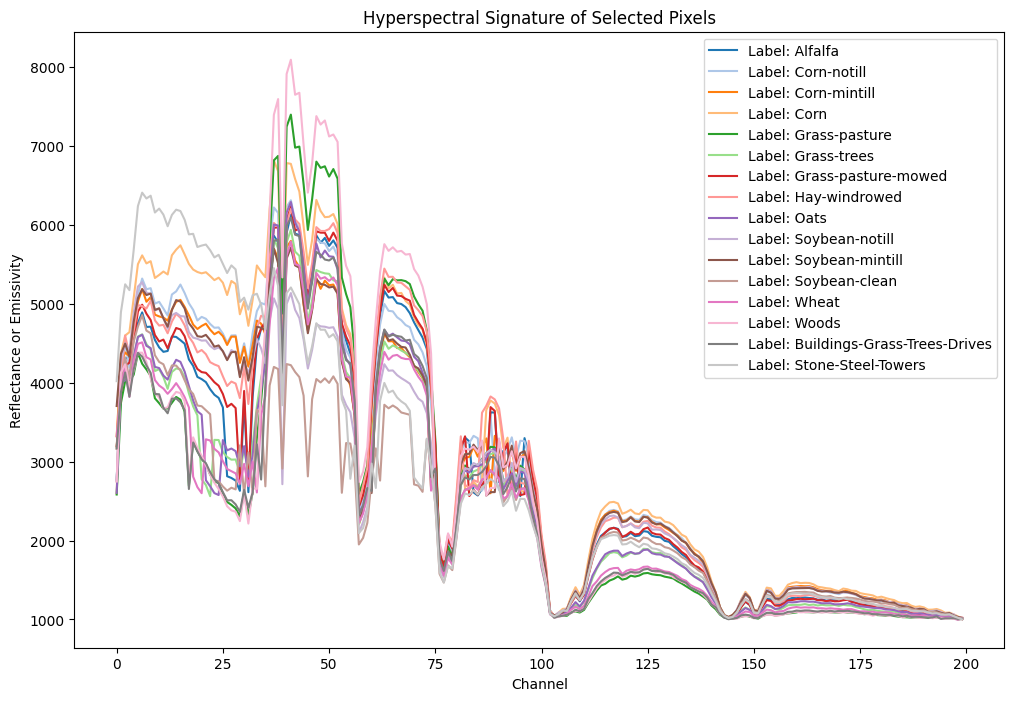

In [ ]:
plot_hyperspectral_signature(pixels_from_categories(processed_gt, processed_image))

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

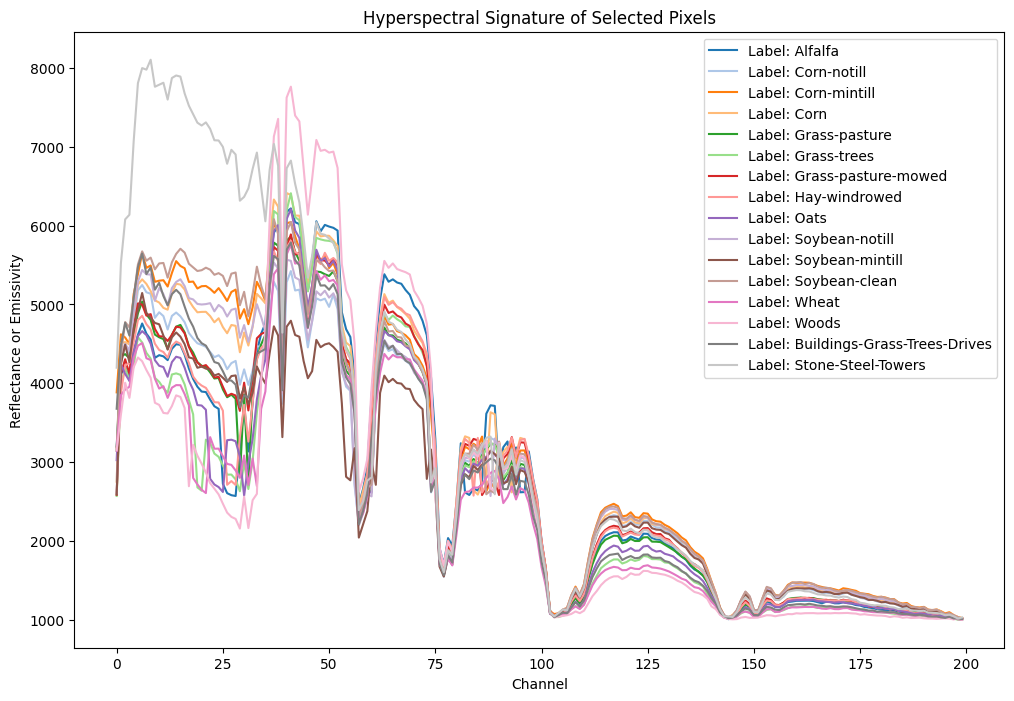

In [ ]:
plot_hyperspectral_signature(pixels_from_categories(processed_gt, processed_image))

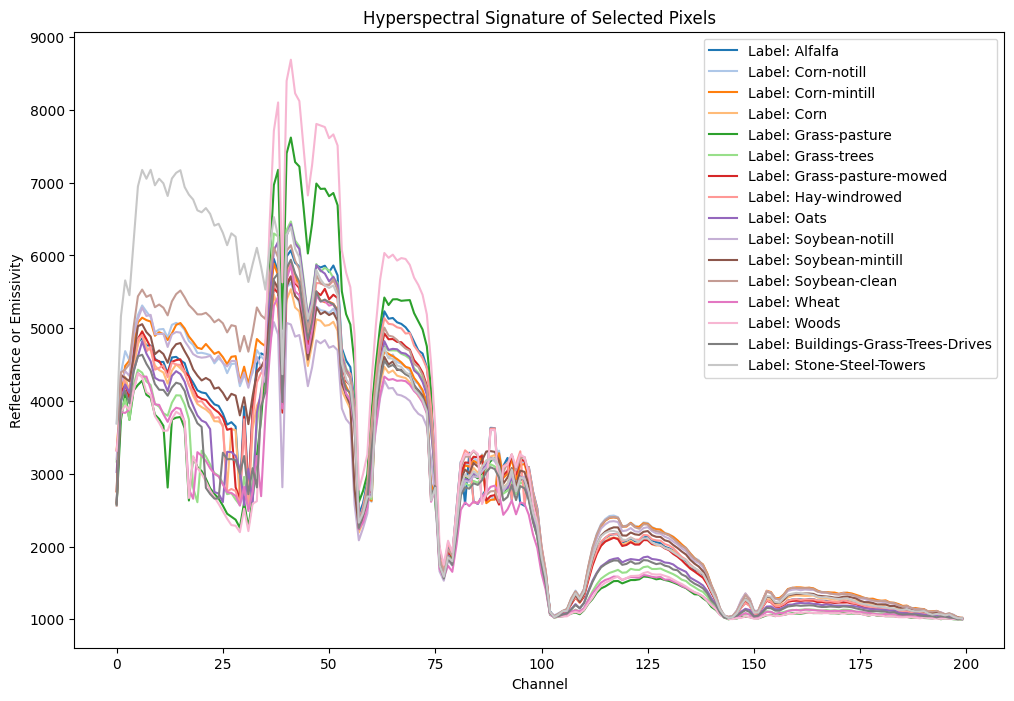

In [ ]:
plot_hyperspectral_signature(pixels_from_categories(processed_gt, processed_image))

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

* Μπορούμε να πούμε ότι κάποια καλλιέργεια είναι πιο εύκολη διαχωρίσιμη όταν η υπογραφή της(ή ένας μέρος αυτής) έχει "αρκετά μεγάλη" απόσταση(στον άξονα Reflectance or Emissivity για το ίδιο Channel) από τις υπογραφές των άλλων καλλιεργειών. Αυτό συμβαίνει για παράδειγμα με την καλλιέργεια με το αχνό-γκρι χρώμα για channels από 1-20, με την καλλιέργεια με το αχνο-ροζ χρώμα για channels 30-50 και 65-75.

* Ενα κανάλι περιέχει χρήσιμη πληροφορία όταν οι στάθμες των φασματικών υπογραφών στο συγκεκριμένο κανάλι έχουν αρκετά μεγάλη απόσταση μεταξύ τους. Το προηγούμενο συμβαίνει για παράδειγμα με τα κανάία από 1-10, ενώ δεν συμβαίνει για τα κανάλια 75-100.



3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών




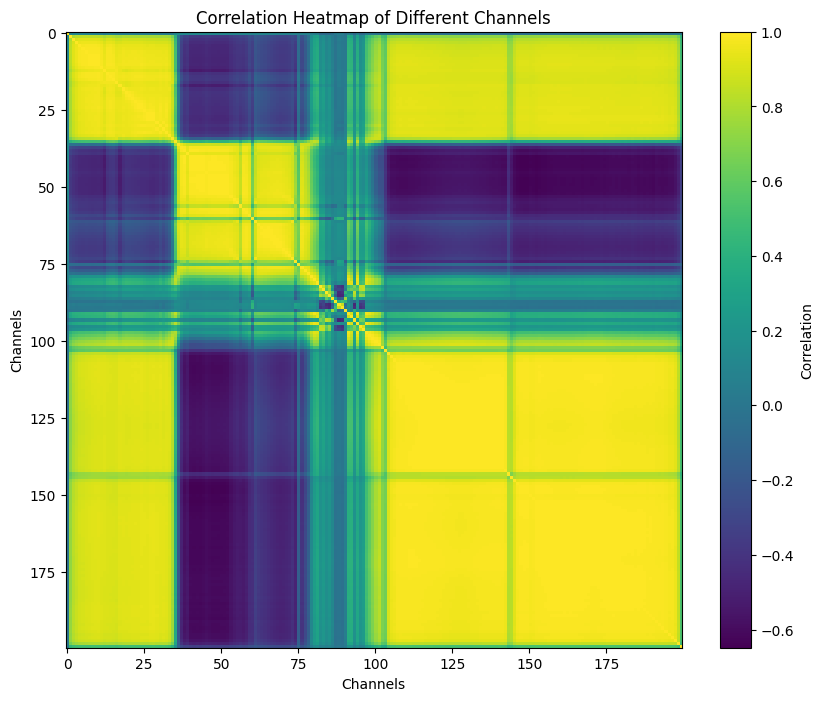

In [ ]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(processed_image, rowvar=False)

# Create the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap of Different Channels')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()


### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [ ]:
from sklearn.cluster import KMeans

X = processed_image
kmeans = KMeans(n_clusters = 16, n_init = 'auto', tol = 1e-5, max_iter = 600).fit(X)


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [ ]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size

    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }
    """
    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))
    """
    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import rand_score, silhouette_score

# To Kmeans δίνει labels από 0 έως 15 και το ground truth έχει labels από 1 έως 16,
# αφού έχουμε αφαιρέσει το 0 (Undefined). Άρα η συνθήκη np.all(uc1 == uc2) θα αποτύχει στο assert.
# Επομένως θα μειώσουμε κατά 1 τα labels της ground truth
def calculate_scores(processed_image, processed_gt, kmeans_labels):
  processed_gt_minus = processed_gt - 1

  translated_predicted = translate_predicted_labels(kmeans_labels, processed_gt_minus)

  # Calculate scores
  conf_matrix = confusion_matrix(processed_gt_minus, translated_predicted)

  acc = accuracy(conf_matrix)
  rand_score_var = rand_score(processed_gt_minus, translated_predicted)
  silhouette_coefficient = silhouette_score(processed_image, translated_predicted)

  scores = {
        'Accuracy': acc,
        'Rand Score': rand_score_var,
        'Silhouette Coefficient': silhouette_coefficient,
    }
  return scores

scores = calculate_scores(processed_image, processed_gt, kmeans.labels_)
# Print reults
print(f"Accuracy Score: {scores['Accuracy']:.4f}")
print(f"Rand Score: {scores['Rand Score']:.4f}")
print(f"Silhouette Score: {scores['Silhouette Coefficient']:.4f}")


map: 0 --> 7
map: 1 --> 4
map: 2 --> 10
map: 3 --> 12
map: 4 --> 9
map: 5 --> 13
map: 6 --> 6
map: 7 --> 3
map: 8 --> 1
map: 9 --> 14
map: 10 --> 5
map: 11 --> 11
map: 12 --> 0
map: 13 --> 2
map: 14 --> 8
map: 15 --> 15
Accuracy Score: 0.3602
Rand Score: 0.8552
Silhouette Score: 0.2763


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

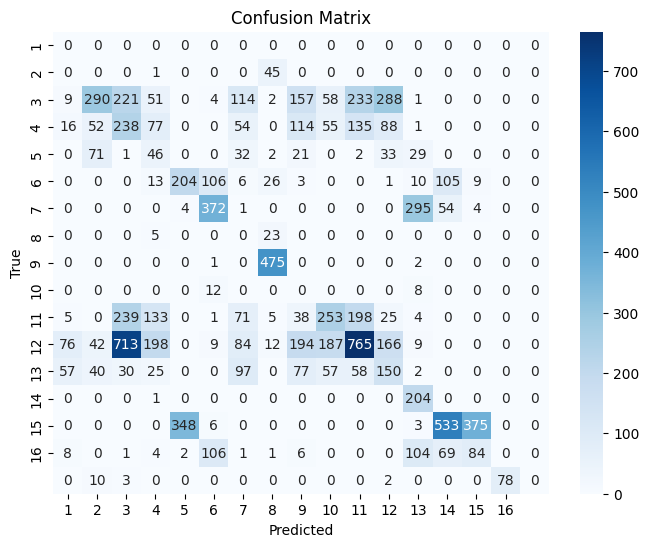

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


translated_predicted = translate_predicted_labels(kmeans.labels_, processed_gt - 1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(processed_gt, translated_predicted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(1, num_classes), yticklabels=range(1, num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

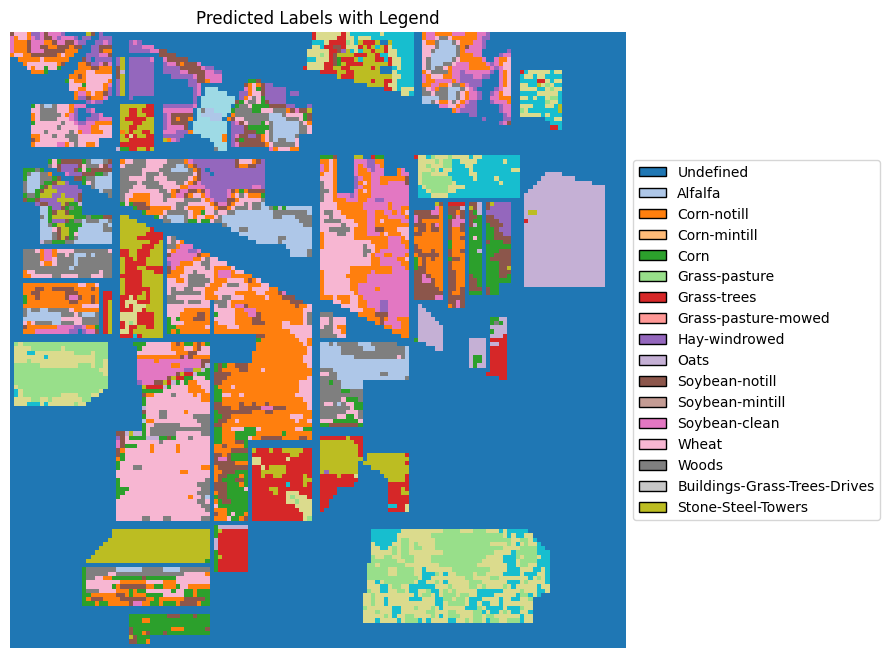

In [ ]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np


# Reshape the translated predicted labels to the original shape
reshaped_translated_predicted = np.zeros_like(ground_truth, dtype=int)
reshaped_translated_predicted.flat[valid_indices] = translated_predicted

# Define the classes list
classes = [
    "Undefined", "Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees",
    "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean",
    "Wheat", "Woods", "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"
]

# Create a figure and display the predicted labels with the mask applied
plt.figure(figsize=(8, 8))
plt.imshow(reshaped_translated_predicted, cmap='tab20')

# Generate legend handles for each class
legend_elements = [Patch(facecolor=plt.cm.tab20(i), edgecolor='black', label=classes[i])
                   for i in range(len(classes))]

# Add the legend to the plot
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Predicted Labels with Legend")
plt.axis('off')
plt.show()


### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [ ]:
from sklearn.decomposition import PCA
X = processed_image
pca = PCA(n_components=3, whiten = True)
pca.fit(X)

PCA(n_components=3, whiten=True)



5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [ ]:
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Principal Component:")
print(explained_variance_ratio)


Explained Variance Ratio for Each Principal Component:
[0.66452713 0.2654258  0.01206197]


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [ ]:
X6a = pca.transform(processed_image)
kmeans6a = KMeans(n_clusters = 16, n_init = 'auto', tol = 1e-5, max_iter = 600).fit(X6a)

# Function defined in 4b
scores6a = calculate_scores(X6a, processed_gt, kmeans6a.labels_)

# Print reults
print(f"Accuracy Score: {scores6a['Accuracy']:.4f}")
print(f"Rand Score: {scores6a['Rand Score']:.4f}")
print(f"Silhouette Score: {scores6a['Silhouette Coefficient']:.4f}")





Accuracy Score: 0.3621
Rand Score: 0.8570
Silhouette Score: 0.3699


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

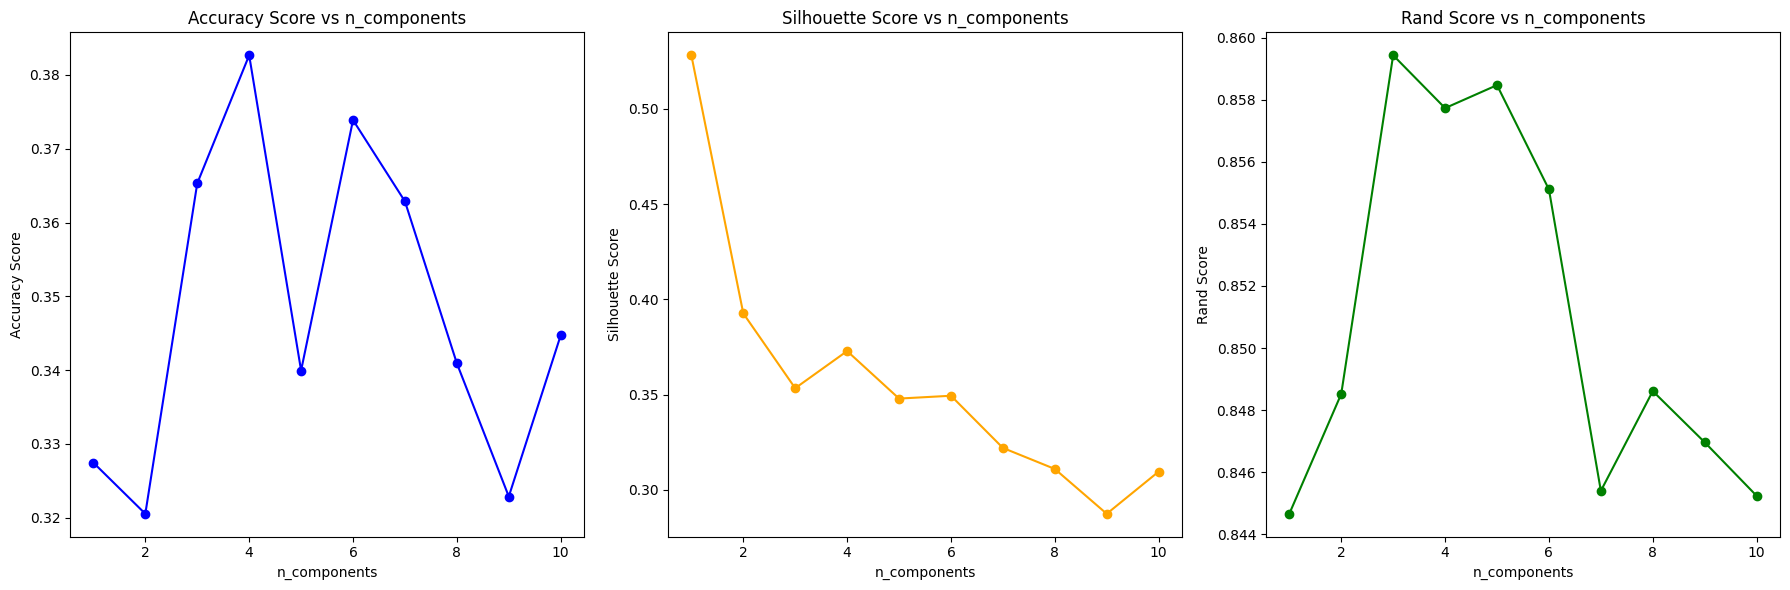

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score



# Define a range of n_components values
n_components_values = list(range(1, 11))

# Lists to store scores
accuracy_scores = []
silhouette_scores = []
rand_scores = []



# Loop through different n_components values
for n_components in n_components_values:
    # PCA
    pca = PCA(n_components = n_components, whiten = True)
    X6b = pca.fit_transform(processed_image)

    # KMeans
    kmeans6b = KMeans(n_clusters=16, n_init = 'auto', tol = 1e-5, max_iter = 600).fit(X6b)

    # Function defined in 4b
    scores6b = calculate_scores(X6b, processed_gt, kmeans6b.labels_)

    # Append scores to lists
    accuracy_scores.append(scores6b['Accuracy'])
    silhouette_scores.append(scores6b['Silhouette Coefficient'])
    rand_scores.append(scores6b['Rand Score'])



# Define metrics and corresponding colors
metrics = ['Accuracy Score', 'Silhouette Score','Rand Score']
colors = ['blue', 'orange', 'green']

# Plot the results
plt.figure(figsize=(18, 6))

for i, metric in enumerate(metrics, 1):
    # Get the corresponding scores and color
    scores = rand_scores if metric == 'Rand Score' else (
        silhouette_scores if metric == 'Silhouette Score' else accuracy_scores
    )
    color = colors[i - 1]

    # Create subplot
    plt.subplot(1, 3, i)
    plt.plot(n_components_values, scores, marker='o', color=color)
    plt.title(f'{metric} vs n_components')
    plt.xlabel('n_components')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()






*   Accuracy: To Accuracy δίνει το ποσοστό των pixels τα οποία έχουν ταξινομηθεί στην σωστή καλλιέργεια με βάση το Ground Truth. Το υψηλότερο Accuracy παρατηρείται όταν έχουμε n_components = 4.
  
*   Silhouette Score: To Silhouette Score δείχνει κατά πόσο τα clusters που δημιοιυργήθηκαν είναι διαχωρίσιμα μεταξύ τους και κατά πόσο κάθε ένα είναι ομοιοεγενές στο εσωτερικό του. Το καλύτερο Silhouette Score παρατηρείται για n_components = 1.

*   Rand Score: Το Rand Score δείχνει, στην περίπτωσή μας, κατά πόσο όμοιο είναι το clustering που έγινε με τον KMeans σε σύγκριση με το clustering στο Ground Truth. Το καλύτερο Rand Score παρατηρείται για n_components = 3

* Οι τιμές του Rand Score για τις διάφορες τιμές του n_components είναι αρκετά κοντά μεταξύ τους, βρίσκονται σε ένα διάστημα [0.845, 0.859] με αρκετά μικρή διασπορά, άρα για συμπεράσματα για την απόδοση του μοντέλου το Rand Score δεν φαίνεται να είναι ιδιαιτέρως χρήσιμο. Κατά την άποψή μου η βέλτιση τιμή για n_components θα ήταν n_components = 4 καθώς για αυτή την τιμή το Accuracy και το Silhouette Score εμφανίζουν ταυτόχρονα σχετικά μεγαλες τιμές.

